In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [2]:
file_name = '/home/kapserge/Documents/dataframe/tweets_trump_wall.csv'

In [3]:
df_tws= pd.read_csv(file_name)

In [5]:
df_tws.shape

(2576, 3)

In [6]:
df_tws.head()

,author,date,text
0,suetsam,2018-12-27 19:03:47,RT @SethAbramson: 25/ I'm just going to stop t...
1,jcforjc7,2018-12-27 19:03:47,"RT @bennyjohnson: Here, CNN asks if troops ser..."
2,jmksd,2018-12-27 19:03:47,RT @Jenn198523: MSM PROVEN WRONG......AGAIN!\n...
3,jane_ERRN,2018-12-27 19:03:47,RT @TrinityResists: @Trinitythecat MAGA is his...
4,ThePaladin00,2018-12-27 19:03:47,My grandmother lost her entire retirement fund...


In [7]:
analyser.polarity_scores("The movie is good")

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [8]:
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [9]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [10]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)    
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

In [11]:
df_tws.head()

,author,date,text
0,suetsam,2018-12-27 19:03:47,RT @SethAbramson: 25/ I'm just going to stop t...
1,jcforjc7,2018-12-27 19:03:47,"RT @bennyjohnson: Here, CNN asks if troops ser..."
2,jmksd,2018-12-27 19:03:47,RT @Jenn198523: MSM PROVEN WRONG......AGAIN!\n...
3,jane_ERRN,2018-12-27 19:03:47,RT @TrinityResists: @Trinitythecat MAGA is his...
4,ThePaladin00,2018-12-27 19:03:47,My grandmother lost her entire retirement fund...


In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [13]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    return lst

In [14]:
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [15]:
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.displot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

In [16]:
df_tws['sent'] = clean_tweets(df_tws['text']) 

In [17]:
df_tws.head()

,author,date,text,sent
0,suetsam,2018-12-27 19:03:47,RT @SethAbramson: 25/ I'm just going to stop t...,25/ I'm just going to stop this thread here—a...
1,jcforjc7,2018-12-27 19:03:47,"RT @bennyjohnson: Here, CNN asks if troops ser...","Here, CNN asks if troops serving in a war zon..."
2,jmksd,2018-12-27 19:03:47,RT @Jenn198523: MSM PROVEN WRONG......AGAIN!\n...,MSM PROVEN WRONG......AGAIN!\nPresident Trump...
3,jane_ERRN,2018-12-27 19:03:47,RT @TrinityResists: @Trinitythecat MAGA is his...,MAGA is his campaign slogan. He registered t...
4,ThePaladin00,2018-12-27 19:03:47,My grandmother lost her entire retirement fund...,My grandmother lost her entire retirement fund...


In [18]:
def calc_vader_sentiment(text):
    sentiment = 1    
    vs = analyser.polarity_scores(str(text))
    compound = vs['compound']    
    if(compound == 0):
        sentiment = -1
    elif(compound >= 0.05):
        sentiment = 2
    elif(compound <= -0.05):
        sentiment = 0    
        return sentiment

In [19]:
df = pd.DataFrame({
    'uid': list(df_tws.index.values),
    'sent': df_tws['sent'],
    'label': [calc_vader_sentiment(x) for x in df_tws['sent']]
})

In [20]:
df.head()

,uid,sent,label
0,0,25/ I'm just going to stop this thread here—a...,0.0
1,1,"Here, CNN asks if troops serving in a war zon...",0.0
2,2,MSM PROVEN WRONG......AGAIN!\nPresident Trump...,NaN
3,3,MAGA is his campaign slogan. He registered t...,NaN
4,4,My grandmother lost her entire retirement fund...,NaN


In [21]:
df_coc = pd.read_csv("./dataframe/tweets_trump_wall.csv", encoding="utf-8")
df_coc.head()

,author,date,text
0,suetsam,2018-12-27 19:03:47,RT @SethAbramson: 25/ I'm just going to stop t...
1,jcforjc7,2018-12-27 19:03:47,"RT @bennyjohnson: Here, CNN asks if troops ser..."
2,jmksd,2018-12-27 19:03:47,RT @Jenn198523: MSM PROVEN WRONG......AGAIN!\n...
3,jane_ERRN,2018-12-27 19:03:47,RT @TrinityResists: @Trinitythecat MAGA is his...
4,ThePaladin00,2018-12-27 19:03:47,My grandmother lost her entire retirement fund...


In [22]:
vs = analyser.polarity_scores('I felt terrible today')
print(vs)

{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}


In [23]:
def calc_vader_sentimentt(text):
    sentiment = 1    
    vs = analyser.polarity_scores(str(text))
    compound = vs['compound'] 
    if compound >= 0.05:
        return 1
    elif (compound > -0.05) and (compound < 0.05):
        return 0
    else:
        return -1

In [24]:
df_coc['text'] = clean_tweets(df_coc['text']) 

In [25]:
df_coc.head()

,author,date,text
0,suetsam,2018-12-27 19:03:47,25/ I'm just going to stop this thread here—a...
1,jcforjc7,2018-12-27 19:03:47,"Here, CNN asks if troops serving in a war zon..."
2,jmksd,2018-12-27 19:03:47,MSM PROVEN WRONG......AGAIN!\nPresident Trump...
3,jane_ERRN,2018-12-27 19:03:47,MAGA is his campaign slogan. He registered t...
4,ThePaladin00,2018-12-27 19:03:47,My grandmother lost her entire retirement fund...


In [26]:
df_coc = pd.DataFrame({
    'uid': list(df_coc.index.values),
    'text': df_coc['text'],
    'sent': [calc_vader_sentimentt(x) for x in df_coc['text']]
})

In [33]:
df_coc.head()

,uid,text,sent
0,0,25/ I'm just going to stop this thread here—a...,-1
1,1,"Here, CNN asks if troops serving in a war zon...",-1
2,2,MSM PROVEN WRONG......AGAIN!\nPresident Trump...,0
3,3,MAGA is his campaign slogan. He registered t...,0
4,4,My grandmother lost her entire retirement fund...,1


In [34]:
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        try:
            st = calc_vader_sentimentt(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.displot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

In [35]:
import matplotlib.pyplot as plt

In [39]:
median_column = df_coc["sent"]

In [40]:
type(median_column)


pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

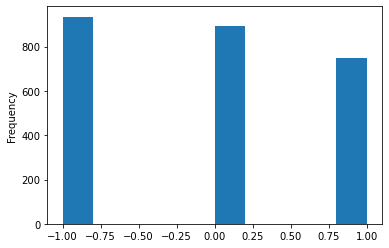

In [41]:
median_column.plot(kind="hist")

In [42]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)    
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

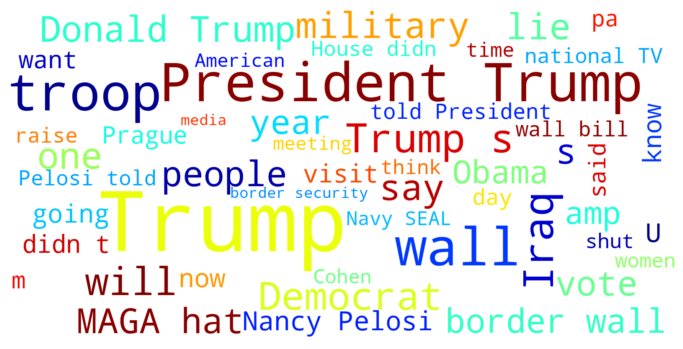

In [43]:
word_cloud(df_coc.text)

In [44]:
tws_post =df_coc['text'][df_coc['sent'] == 1]

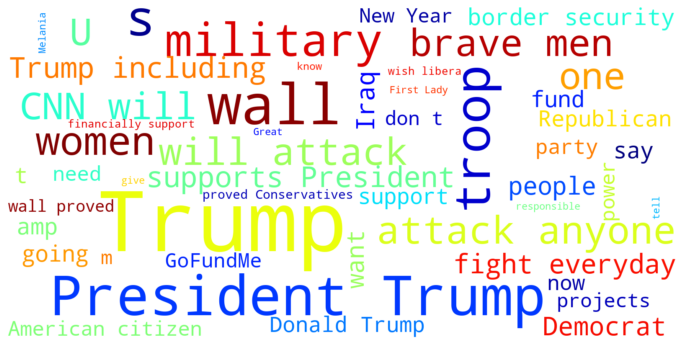

In [45]:
word_cloud(tws_post)

In [46]:
tws_neg =df_coc['text'][df_coc['sent'] == -1]

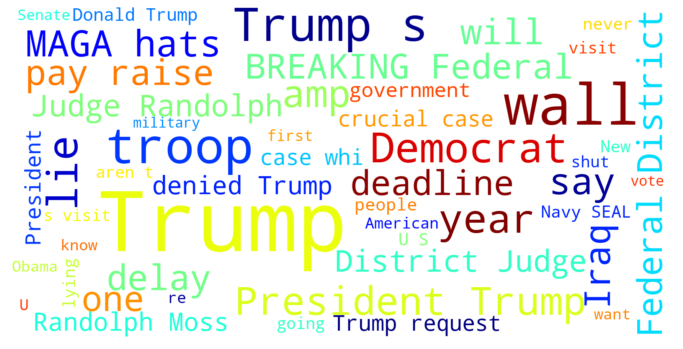

In [47]:
word_cloud(tws_neg)

In [49]:
neg_tweets = df_coc.sent.value_counts()[-1]
pos_tweets = df_coc.sent.value_counts()[1]
tre_tweets = df_coc.sent.value_counts()[0]

In [51]:
data = [df_coc.sent.value_counts()[-1], df_coc.sent.value_counts()[1], df_coc.sent.value_counts()[0]]
data

[935, 750, 891]

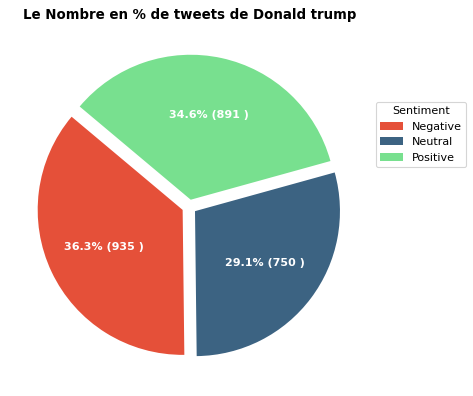

In [53]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df_coc.sent.value_counts()[-1], df_coc.sent.value_counts()[1], df_coc.sent.value_counts()[0]]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Le Nombre en % de tweets de Donald trump", fontsize=12, fontweight="bold")
plt.show()